In [1]:
import torch
import data
import tqdm
import models
import numpy as np
from torchvision.transforms import v2
from PIL import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
EPOCHS = 200
BATCH_SIZE = 10
LR = 5e-6

In [3]:
def show_random_image(dataset, model, length):
    i = np.random.randint(low=0,high=length)
    LR, trueHR = dataset[i]
    t1 = torch.tensor(LR.view(1,1,75,75))
    t2 = model(t1.float().to(device)).cpu().detach()
    image1 = Image.fromarray(t1.numpy()[0][0]*255)
    image2 = Image.fromarray(t2.numpy()[0][0]*255)
    image3 = Image.fromarray(trueHR.numpy()[0]*255)
    return image1, image2, image3

In [4]:
dataset = data.LensingDataset('../dataset_1/','vanilla')
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.9, 0.1])
train_dataloader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)
val_dataloader = torch.utils.data.DataLoader(val_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)

In [5]:
model = models.Resnet_SISR(residual_depth=10, 
                           in_channels=1, 
                           maginfication=2, 
                           num_magnifications=1, 
                           latent_channel_count=64).to(device)
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(params=model.parameters(),lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt,'min',patience=2,factor=0.1)

In [6]:
images = []
history = {'val_loss':[], 'loss':[]}
best_val_loss = np.inf
best_weights = None
for epoch in range(EPOCHS):
    losses = []
    model.train()
    for i,(x,y) in enumerate(tqdm.tqdm(train_dataloader, desc=f"Training epoch {epoch+1}")):
        (x, y) = (x.float().to(device), y.float().to(device))
        x = model(x)
        loss = loss_fn(x,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Training at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    history['loss'].append(np.mean(losses))
    train_loss = np.mean(losses)
    model.eval()
    losses = []
    for i,(x,y) in enumerate(tqdm.tqdm(val_dataloader, desc=f"Validation epoch {epoch}")):
        (x, y) = (x.float().to(device), y.to(device))
        x = model(x)
        val_loss = loss_fn(x,y)
        losses.append(float(val_loss))
    if best_val_loss > np.mean(losses):
        best_val_loss = np.mean(losses)
        best_weights = model.state_dict()
    history['val_loss'].append(np.mean(losses))
    print(f"Validation at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    # images.append((show_random_image(train_dataset, model, 900)))
    # scheduler.step(train_loss)

Training epoch 1: 100%|██████████| 90/90 [00:15<00:00,  5.90it/s]


Training at epoch 1/200: 0.00699672999067439 at LR=5e-06


Validation epoch 0: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 1/200: 0.00272472845313191 at LR=5e-06


Training epoch 2: 100%|██████████| 90/90 [00:13<00:00,  6.74it/s]


Training at epoch 2/200: 0.002017568534291867 at LR=5e-06


Validation epoch 1: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 2/200: 0.0016373921643716449 at LR=5e-06


Training epoch 3: 100%|██████████| 90/90 [00:13<00:00,  6.73it/s]


Training at epoch 3/200: 0.0012853638230202098 at LR=5e-06


Validation epoch 2: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 3/200: 0.0011178745566584282 at LR=5e-06


Training epoch 4: 100%|██████████| 90/90 [00:13<00:00,  6.70it/s]


Training at epoch 4/200: 0.0009338334377389402 at LR=5e-06


Validation epoch 3: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Validation at epoch 4/200: 0.0008419116673794837 at LR=5e-06


Training epoch 5: 100%|██████████| 90/90 [00:13<00:00,  6.68it/s]


Training at epoch 5/200: 0.0007610696865918322 at LR=5e-06


Validation epoch 4: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 5/200: 0.0006796889171660633 at LR=5e-06


Training epoch 6: 100%|██████████| 90/90 [00:13<00:00,  6.68it/s]


Training at epoch 6/200: 0.0006312361465663546 at LR=5e-06


Validation epoch 5: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 6/200: 0.0005603965540102536 at LR=5e-06


Training epoch 7: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 7/200: 0.0005417723920092814 at LR=5e-06


Validation epoch 6: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 7/200: 0.0004984536017088605 at LR=5e-06


Training epoch 8: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 8/200: 0.0004823990560705877 at LR=5e-06


Validation epoch 7: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 8/200: 0.0004293604212392251 at LR=5e-06


Training epoch 9: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 9/200: 0.000426368483587996 at LR=5e-06


Validation epoch 8: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 9/200: 0.000365456644123177 at LR=5e-06


Training epoch 10: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 10/200: 0.0003737884900248092 at LR=5e-06


Validation epoch 9: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 10/200: 0.0003196666562560488 at LR=5e-06


Training epoch 11: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 11/200: 0.00032580597875898497 at LR=5e-06


Validation epoch 10: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 11/200: 0.0002950928309661483 at LR=5e-06


Training epoch 12: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 12/200: 0.00032761954967605155 at LR=5e-06


Validation epoch 11: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 12/200: 0.00029124969751765474 at LR=5e-06


Training epoch 13: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 13/200: 0.00029191648484104207 at LR=5e-06


Validation epoch 12: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 13/200: 0.00024332268829491471 at LR=5e-06


Training epoch 14: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 14/200: 0.00026468669821042565 at LR=5e-06


Validation epoch 13: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 14/200: 0.00023484832288491782 at LR=5e-06


Training epoch 15: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 15/200: 0.00025322993670771313 at LR=5e-06


Validation epoch 14: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 15/200: 0.00020679004751594598 at LR=5e-06


Training epoch 16: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 16/200: 0.00023220630262383365 at LR=5e-06


Validation epoch 15: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 16/200: 0.00021602251426561145 at LR=5e-06


Training epoch 17: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 17/200: 0.00022900326180711595 at LR=5e-06


Validation epoch 16: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 17/200: 0.00018499756847600266 at LR=5e-06


Training epoch 18: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 18/200: 0.00021971137676801946 at LR=5e-06


Validation epoch 17: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 18/200: 0.00019091656281497183 at LR=5e-06


Training epoch 19: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 19/200: 0.00020325209997180437 at LR=5e-06


Validation epoch 18: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 19/200: 0.00017191525164634395 at LR=5e-06


Training epoch 20: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 20/200: 0.0001949084141718534 at LR=5e-06


Validation epoch 19: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 20/200: 0.00017018808164911178 at LR=5e-06


Training epoch 21: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 21/200: 0.00019756383165561904 at LR=5e-06


Validation epoch 20: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 21/200: 0.00017853712703662253 at LR=5e-06


Training epoch 22: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 22/200: 0.0001910663452387477 at LR=5e-06


Validation epoch 21: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 22/200: 0.0001595175610932483 at LR=5e-06


Training epoch 23: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 23/200: 0.00018611037974349326 at LR=5e-06


Validation epoch 22: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 23/200: 0.00015692144606537615 at LR=5e-06


Training epoch 24: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 24/200: 0.00019052866700803862 at LR=5e-06


Validation epoch 23: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 24/200: 0.00014708780154716605 at LR=5e-06


Training epoch 25: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 25/200: 0.00018900243562206418 at LR=5e-06


Validation epoch 24: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 25/200: 0.00015439618130517959 at LR=5e-06


Training epoch 26: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 26/200: 0.00017875686365490158 at LR=5e-06


Validation epoch 25: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 26/200: 0.0001425374744605562 at LR=5e-06


Training epoch 27: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 27/200: 0.00016869141626456337 at LR=5e-06


Validation epoch 26: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 27/200: 0.00015366822990134235 at LR=5e-06


Training epoch 28: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 28/200: 0.00016941634385148063 at LR=5e-06


Validation epoch 27: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 28/200: 0.00015073176555269755 at LR=5e-06


Training epoch 29: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 29/200: 0.00017572585735858108 at LR=5e-06


Validation epoch 28: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 29/200: 0.00018718334148886575 at LR=5e-06


Training epoch 30: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 30/200: 0.0001615935239695116 at LR=5e-06


Validation epoch 29: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 30/200: 0.00013164887474488864 at LR=5e-06


Training epoch 31: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 31/200: 0.0001622951421369281 at LR=5e-06


Validation epoch 30: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 31/200: 0.00014784954475506276 at LR=5e-06


Training epoch 32: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 32/200: 0.0001637226581806317 at LR=5e-06


Validation epoch 31: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 32/200: 0.0001290814389189159 at LR=5e-06


Training epoch 33: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 33/200: 0.00016370915933900204 at LR=5e-06


Validation epoch 32: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 33/200: 0.00014370939612801353 at LR=5e-06


Training epoch 34: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 34/200: 0.00014856526548909541 at LR=5e-06


Validation epoch 33: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 34/200: 0.0001227090824904735 at LR=5e-06


Training epoch 35: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 35/200: 0.00015603431974240165 at LR=5e-06


Validation epoch 34: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 35/200: 0.00012312273728109436 at LR=5e-06


Training epoch 36: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 36/200: 0.0001475213497340317 at LR=5e-06


Validation epoch 35: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 36/200: 0.0001303860199016501 at LR=5e-06


Training epoch 37: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 37/200: 0.00015080302877726757 at LR=5e-06


Validation epoch 36: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 37/200: 0.00011797244525356141 at LR=5e-06


Training epoch 38: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 38/200: 0.0001526779419186318 at LR=5e-06


Validation epoch 37: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Validation at epoch 38/200: 0.00011680002272719555 at LR=5e-06


Training epoch 39: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 39/200: 0.00014276886625642267 at LR=5e-06


Validation epoch 38: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 39/200: 0.00012939264514639167 at LR=5e-06


Training epoch 40: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 40/200: 0.0001543332784624201 at LR=5e-06


Validation epoch 39: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 40/200: 0.0001246083165791887 at LR=5e-06


Training epoch 41: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 41/200: 0.00014541538136351542 at LR=5e-06


Validation epoch 40: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 41/200: 0.00011539551901301687 at LR=5e-06


Training epoch 42: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 42/200: 0.00014147677745010394 at LR=5e-06


Validation epoch 41: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 42/200: 0.00011268811958350883 at LR=5e-06


Training epoch 43: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 43/200: 0.00014020915380873097 at LR=5e-06


Validation epoch 42: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 43/200: 0.0001108771199385589 at LR=5e-06


Training epoch 44: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 44/200: 0.0001472469036040517 at LR=5e-06


Validation epoch 43: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 44/200: 0.00011671691173298093 at LR=5e-06


Training epoch 45: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 45/200: 0.00014733781548178135 at LR=5e-06


Validation epoch 44: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Validation at epoch 45/200: 0.00011256717778858544 at LR=5e-06


Training epoch 46: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 46/200: 0.00014309269123865913 at LR=5e-06


Validation epoch 45: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 46/200: 0.00011189507243462114 at LR=5e-06


Training epoch 47: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 47/200: 0.0001294846948035734 at LR=5e-06


Validation epoch 46: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 47/200: 0.00010937965977945764 at LR=5e-06


Training epoch 48: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 48/200: 0.0001350363256480907 at LR=5e-06


Validation epoch 47: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 48/200: 0.0001077313096708036 at LR=5e-06


Training epoch 49: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 49/200: 0.0001409240232735303 at LR=5e-06


Validation epoch 48: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 49/200: 0.0001481000207583321 at LR=5e-06


Training epoch 50: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 50/200: 0.00013218832561202968 at LR=5e-06


Validation epoch 49: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 50/200: 0.00010593230649720995 at LR=5e-06


Training epoch 51: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 51/200: 0.00014022422538902094 at LR=5e-06


Validation epoch 50: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 51/200: 0.00011475719141856581 at LR=5e-06


Training epoch 52: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 52/200: 0.00012660813129817446 at LR=5e-06


Validation epoch 51: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 52/200: 0.0001051414103971041 at LR=5e-06


Training epoch 53: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 53/200: 0.00013005097660223126 at LR=5e-06


Validation epoch 52: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Validation at epoch 53/200: 0.00011471428215589348 at LR=5e-06


Training epoch 54: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 54/200: 0.00012778515916175417 at LR=5e-06


Validation epoch 53: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 54/200: 0.0001051723473153679 at LR=5e-06


Training epoch 55: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 55/200: 0.00013343363688262698 at LR=5e-06


Validation epoch 54: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 55/200: 0.00010146749292502886 at LR=5e-06


Training epoch 56: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 56/200: 0.00012476408293069755 at LR=5e-06


Validation epoch 55: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 56/200: 0.00010104448265507024 at LR=5e-06


Training epoch 57: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 57/200: 0.000123000813133937 at LR=5e-06


Validation epoch 56: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 57/200: 9.916995289308995e-05 at LR=5e-06


Training epoch 58: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 58/200: 0.0001289378096569433 at LR=5e-06


Validation epoch 57: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 58/200: 0.0001106669357496934 at LR=5e-06


Training epoch 59: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 59/200: 0.0001263786470291153 at LR=5e-06


Validation epoch 58: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 59/200: 9.888803739243243e-05 at LR=5e-06


Training epoch 60: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 60/200: 0.00012384711646720663 at LR=5e-06


Validation epoch 59: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 60/200: 9.863588434330253e-05 at LR=5e-06


Training epoch 61: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 61/200: 0.0001284946081998189 at LR=5e-06


Validation epoch 60: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 61/200: 0.00010119321920833247 at LR=5e-06


Training epoch 62: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 62/200: 0.00012049426376405689 at LR=5e-06


Validation epoch 61: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 62/200: 0.00010346346078775135 at LR=5e-06


Training epoch 63: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 63/200: 0.00012451869026537882 at LR=5e-06


Validation epoch 62: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 63/200: 0.00010292255792942297 at LR=5e-06


Training epoch 64: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 64/200: 0.00012753124909876433 at LR=5e-06


Validation epoch 63: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 64/200: 0.00010861567046692165 at LR=5e-06


Training epoch 65: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 65/200: 0.0001191963710071933 at LR=5e-06


Validation epoch 64: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 65/200: 0.0001440884797554383 at LR=5e-06


Training epoch 66: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 66/200: 0.00011229959030364019 at LR=5e-06


Validation epoch 65: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 66/200: 9.898349398545119e-05 at LR=5e-06


Training epoch 67: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 67/200: 0.0001233332328006832 at LR=5e-06


Validation epoch 66: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 67/200: 0.00010466236576996193 at LR=5e-06


Training epoch 68: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 68/200: 0.0001211429417404967 at LR=5e-06


Validation epoch 67: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 68/200: 0.00010949332135165116 at LR=5e-06


Training epoch 69: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 69/200: 0.00011877561895137964 at LR=5e-06


Validation epoch 68: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 69/200: 9.465546966139057e-05 at LR=5e-06


Training epoch 70: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 70/200: 0.00012163478911841392 at LR=5e-06


Validation epoch 69: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 70/200: 0.00013736867903578525 at LR=5e-06


Training epoch 71: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 71/200: 0.000123834279252656 at LR=5e-06


Validation epoch 70: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 71/200: 0.00012598941508602446 at LR=5e-06


Training epoch 72: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 72/200: 0.0001157803289566396 at LR=5e-06


Validation epoch 71: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 72/200: 9.56286773198437e-05 at LR=5e-06


Training epoch 73: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 73/200: 0.00011952324736436518 at LR=5e-06


Validation epoch 72: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 73/200: 9.534371130147718e-05 at LR=5e-06


Training epoch 74: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 74/200: 0.0001167795554566611 at LR=5e-06


Validation epoch 73: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 74/200: 0.00010485688972577203 at LR=5e-06


Training epoch 75: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 75/200: 0.00011676092779250919 at LR=5e-06


Validation epoch 74: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 75/200: 0.00010574946866936774 at LR=5e-06


Training epoch 76: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 76/200: 0.00011568983140427412 at LR=5e-06


Validation epoch 75: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 76/200: 9.658491619117339e-05 at LR=5e-06


Training epoch 77: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 77/200: 0.00010691539808047108 at LR=5e-06


Validation epoch 76: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 77/200: 9.17445088206471e-05 at LR=5e-06


Training epoch 78: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 78/200: 0.00011110846050238858 at LR=5e-06


Validation epoch 77: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 78/200: 0.0001100892332286371 at LR=5e-06


Training epoch 79: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 79/200: 0.00011057700515569499 at LR=5e-06


Validation epoch 78: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 79/200: 0.0001099529574271741 at LR=5e-06


Training epoch 80: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 80/200: 0.00011239658463940335 at LR=5e-06


Validation epoch 79: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 80/200: 0.00012251851678159918 at LR=5e-06


Training epoch 81: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 81/200: 0.00011672548959419752 at LR=5e-06


Validation epoch 80: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 81/200: 0.00019513275778580444 at LR=5e-06


Training epoch 82: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 82/200: 0.00010955040027814297 at LR=5e-06


Validation epoch 81: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 82/200: 9.043380758784808e-05 at LR=5e-06


Training epoch 83: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 83/200: 0.00011413125951852029 at LR=5e-06


Validation epoch 82: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 83/200: 9.598061652364554e-05 at LR=5e-06


Training epoch 84: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 84/200: 0.00011297497597600644 at LR=5e-06


Validation epoch 83: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 84/200: 8.907900948296338e-05 at LR=5e-06


Training epoch 85: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 85/200: 0.00010689801048202854 at LR=5e-06


Validation epoch 84: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 85/200: 9.947835677706952e-05 at LR=5e-06


Training epoch 86: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 86/200: 0.00011225351708061579 at LR=5e-06


Validation epoch 85: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 86/200: 8.829280565851495e-05 at LR=5e-06


Training epoch 87: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 87/200: 0.00011025495097985387 at LR=5e-06


Validation epoch 86: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 87/200: 9.077891079209988e-05 at LR=5e-06


Training epoch 88: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 88/200: 0.00010728285350422893 at LR=5e-06


Validation epoch 87: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 88/200: 0.00013474629238579457 at LR=5e-06


Training epoch 89: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 89/200: 0.00010904791391415831 at LR=5e-06


Validation epoch 88: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 89/200: 9.10043687138776e-05 at LR=5e-06


Training epoch 90: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 90/200: 0.00010657738587017067 at LR=5e-06


Validation epoch 89: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 90/200: 8.767816399063651e-05 at LR=5e-06


Training epoch 91: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s]


Training at epoch 91/200: 0.00011693118988963155 at LR=5e-06


Validation epoch 90: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 91/200: 0.00013011916934625766 at LR=5e-06


Training epoch 92: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 92/200: 0.00011317203008931958 at LR=5e-06


Validation epoch 91: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 92/200: 9.30085871651929e-05 at LR=5e-06


Training epoch 93: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 93/200: 0.00010341422870017899 at LR=5e-06


Validation epoch 92: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 93/200: 9.268905577376398e-05 at LR=5e-06


Training epoch 94: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 94/200: 0.0001102389099186338 at LR=5e-06


Validation epoch 93: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 94/200: 8.682918250502556e-05 at LR=5e-06


Training epoch 95: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 95/200: 0.00010744457629496335 at LR=5e-06


Validation epoch 94: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 95/200: 0.00011438296407773011 at LR=5e-06


Training epoch 96: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 96/200: 0.0001030156353307474 at LR=5e-06


Validation epoch 95: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 96/200: 9.933359592923037e-05 at LR=5e-06


Training epoch 97: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 97/200: 0.00010462286599148583 at LR=5e-06


Validation epoch 96: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 97/200: 8.807848887649683e-05 at LR=5e-06


Training epoch 98: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 98/200: 0.00010068983796776997 at LR=5e-06


Validation epoch 97: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 98/200: 0.00010354883984652511 at LR=5e-06


Training epoch 99: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 99/200: 0.00010894915604795744 at LR=5e-06


Validation epoch 98: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 99/200: 9.513726142483056e-05 at LR=5e-06


Training epoch 100: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 100/200: 0.00010378440799993567 at LR=5e-06


Validation epoch 99: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 100/200: 8.635593231753194e-05 at LR=5e-06


Training epoch 101: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 101/200: 0.00010453155102570437 at LR=5e-06


Validation epoch 100: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 101/200: 0.00011828927143661086 at LR=5e-06


Training epoch 102: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 102/200: 0.00010473445468556343 at LR=5e-06


Validation epoch 101: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 102/200: 0.00010919257718066543 at LR=5e-06


Training epoch 103: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 103/200: 0.00011090822024723618 at LR=5e-06


Validation epoch 102: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 103/200: 0.00012367605275616448 at LR=5e-06


Training epoch 104: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 104/200: 9.768576225421081e-05 at LR=5e-06


Validation epoch 103: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 104/200: 8.881194453175476e-05 at LR=5e-06


Training epoch 105: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 105/200: 9.678938068747003e-05 at LR=5e-06


Validation epoch 104: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 105/200: 0.00010264888339026515 at LR=5e-06


Training epoch 106: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 106/200: 9.957901865062822e-05 at LR=5e-06


Validation epoch 105: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 106/200: 8.548806715290096e-05 at LR=5e-06


Training epoch 107: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 107/200: 9.825702137378458e-05 at LR=5e-06


Validation epoch 106: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 107/200: 8.634416215748729e-05 at LR=5e-06


Training epoch 108: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 108/200: 9.883141222720345e-05 at LR=5e-06


Validation epoch 107: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 108/200: 8.422309666092622e-05 at LR=5e-06


Training epoch 109: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 109/200: 9.809379060041264e-05 at LR=5e-06


Validation epoch 108: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 109/200: 8.551961643369346e-05 at LR=5e-06


Training epoch 110: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 110/200: 0.00010480373578805788 at LR=5e-06


Validation epoch 109: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 110/200: 8.658499235957866e-05 at LR=5e-06


Training epoch 111: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 111/200: 0.00010254592214348829 at LR=5e-06


Validation epoch 110: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 111/200: 8.428610104122488e-05 at LR=5e-06


Training epoch 112: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 112/200: 9.973103280774214e-05 at LR=5e-06


Validation epoch 111: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 112/200: 9.48436577029254e-05 at LR=5e-06


Training epoch 113: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 113/200: 9.66711465379275e-05 at LR=5e-06


Validation epoch 112: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 113/200: 8.382557568211578e-05 at LR=5e-06


Training epoch 114: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 114/200: 9.43896446389974e-05 at LR=5e-06


Validation epoch 113: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 114/200: 9.071564597112508e-05 at LR=5e-06


Training epoch 115: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 115/200: 0.00010039563243885318 at LR=5e-06


Validation epoch 114: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 115/200: 8.735517637574012e-05 at LR=5e-06


Training epoch 116: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 116/200: 9.660050685245854e-05 at LR=5e-06


Validation epoch 115: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 116/200: 9.858535230364686e-05 at LR=5e-06


Training epoch 117: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 117/200: 9.908225288705176e-05 at LR=5e-06


Validation epoch 116: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 117/200: 0.00010824250018724098 at LR=5e-06


Training epoch 118: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 118/200: 9.222602723942448e-05 at LR=5e-06


Validation epoch 117: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 118/200: 9.187696662767821e-05 at LR=5e-06


Training epoch 119: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 119/200: 9.505694745005005e-05 at LR=5e-06


Validation epoch 118: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 119/200: 8.588281307743233e-05 at LR=5e-06


Training epoch 120: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 120/200: 9.626285552965581e-05 at LR=5e-06


Validation epoch 119: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 120/200: 8.223349228196698e-05 at LR=5e-06


Training epoch 121: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 121/200: 9.668432798611724e-05 at LR=5e-06


Validation epoch 120: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 121/200: 8.315858495146723e-05 at LR=5e-06


Training epoch 122: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 122/200: 9.318849050840881e-05 at LR=5e-06


Validation epoch 121: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 122/200: 8.396131421478069e-05 at LR=5e-06


Training epoch 123: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 123/200: 9.943946659202791e-05 at LR=5e-06


Validation epoch 122: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 123/200: 8.458907506038961e-05 at LR=5e-06


Training epoch 124: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 124/200: 9.714723305983675e-05 at LR=5e-06


Validation epoch 123: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 124/200: 8.217256755520445e-05 at LR=5e-06


Training epoch 125: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 125/200: 0.0001063870200596284 at LR=5e-06


Validation epoch 124: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 125/200: 0.00016405309130028962 at LR=5e-06


Training epoch 126: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 126/200: 9.254400978938469e-05 at LR=5e-06


Validation epoch 125: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 126/200: 8.864900947559836e-05 at LR=5e-06


Training epoch 127: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 127/200: 9.258971129181899e-05 at LR=5e-06


Validation epoch 126: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 127/200: 8.322355768506498e-05 at LR=5e-06


Training epoch 128: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 128/200: 9.471188330078601e-05 at LR=5e-06


Validation epoch 127: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 128/200: 9.725448067748706e-05 at LR=5e-06


Training epoch 129: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 129/200: 8.690076728170323e-05 at LR=5e-06


Validation epoch 128: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 129/200: 8.285175027933906e-05 at LR=5e-06


Training epoch 130: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 130/200: 9.05752971852457e-05 at LR=5e-06


Validation epoch 129: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Validation at epoch 130/200: 8.932242103050629e-05 at LR=5e-06


Training epoch 131: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 131/200: 9.064937912626193e-05 at LR=5e-06


Validation epoch 130: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 131/200: 9.682933749917618e-05 at LR=5e-06


Training epoch 132: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 132/200: 9.556914471128644e-05 at LR=5e-06


Validation epoch 131: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 132/200: 8.031101632647965e-05 at LR=5e-06


Training epoch 133: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 133/200: 9.306285913529185e-05 at LR=5e-06


Validation epoch 132: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 133/200: 9.553206819157688e-05 at LR=5e-06


Training epoch 134: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 134/200: 9.059027579496614e-05 at LR=5e-06


Validation epoch 133: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 134/200: 8.062372552626104e-05 at LR=5e-06


Training epoch 135: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 135/200: 9.101529471485668e-05 at LR=5e-06


Validation epoch 134: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 135/200: 8.593877505785804e-05 at LR=5e-06


Training epoch 136: 100%|██████████| 90/90 [00:13<00:00,  6.63it/s]


Training at epoch 136/200: 9.151012887337452e-05 at LR=5e-06


Validation epoch 135: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 136/200: 9.308002074049549e-05 at LR=5e-06


Training epoch 137: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 137/200: 9.074481915579074e-05 at LR=5e-06


Validation epoch 136: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 137/200: 8.213083246721537e-05 at LR=5e-06


Training epoch 138: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 138/200: 9.185471571981907e-05 at LR=5e-06


Validation epoch 137: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 138/200: 0.00010002442220872861 at LR=5e-06


Training epoch 139: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 139/200: 8.80984543376447e-05 at LR=5e-06


Validation epoch 138: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 139/200: 7.998517724125905e-05 at LR=5e-06


Training epoch 140: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 140/200: 9.002620241113213e-05 at LR=5e-06


Validation epoch 139: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 140/200: 8.417870706939986e-05 at LR=5e-06


Training epoch 141: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 141/200: 8.76828048300619e-05 at LR=5e-06


Validation epoch 140: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 141/200: 8.401440923455335e-05 at LR=5e-06


Training epoch 142: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 142/200: 8.957243860802717e-05 at LR=5e-06


Validation epoch 141: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Validation at epoch 142/200: 8.411709506864521e-05 at LR=5e-06


Training epoch 143: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 143/200: 8.545770809481231e-05 at LR=5e-06


Validation epoch 142: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 143/200: 8.018638428698688e-05 at LR=5e-06


Training epoch 144: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 144/200: 8.993617860445132e-05 at LR=5e-06


Validation epoch 143: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Validation at epoch 144/200: 7.83749692782351e-05 at LR=5e-06


Training epoch 145: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 145/200: 8.529925317917433e-05 at LR=5e-06


Validation epoch 144: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Validation at epoch 145/200: 8.127868770134787e-05 at LR=5e-06


Training epoch 146: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 146/200: 8.399061067999961e-05 at LR=5e-06


Validation epoch 145: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 146/200: 7.771573057971747e-05 at LR=5e-06


Training epoch 147: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 147/200: 8.723572520668515e-05 at LR=5e-06


Validation epoch 146: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 147/200: 8.828812085903336e-05 at LR=5e-06


Training epoch 148: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 148/200: 8.885496596728141e-05 at LR=5e-06


Validation epoch 147: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 148/200: 9.670878401990429e-05 at LR=5e-06


Training epoch 149: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 149/200: 9.005112579971966e-05 at LR=5e-06


Validation epoch 148: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 149/200: 8.160030906921581e-05 at LR=5e-06


Training epoch 150: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 150/200: 8.634273334690887e-05 at LR=5e-06


Validation epoch 149: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 150/200: 7.79573084781184e-05 at LR=5e-06


Training epoch 151: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 151/200: 8.541931892978028e-05 at LR=5e-06


Validation epoch 150: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 151/200: 7.802553018285296e-05 at LR=5e-06


Training epoch 152: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 152/200: 8.502940626284626e-05 at LR=5e-06


Validation epoch 151: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 152/200: 9.812537872749296e-05 at LR=5e-06


Training epoch 153: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 153/200: 8.667527064163652e-05 at LR=5e-06


Validation epoch 152: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 153/200: 7.74050208557677e-05 at LR=5e-06


Training epoch 154: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 154/200: 8.634657618434479e-05 at LR=5e-06


Validation epoch 153: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 154/200: 7.74500880581258e-05 at LR=5e-06


Training epoch 155: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 155/200: 8.58754494402092e-05 at LR=5e-06


Validation epoch 154: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 155/200: 7.960270741353408e-05 at LR=5e-06


Training epoch 156: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 156/200: 8.329505750831837e-05 at LR=5e-06


Validation epoch 155: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 156/200: 7.826376854226697e-05 at LR=5e-06


Training epoch 157: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 157/200: 8.386125490586791e-05 at LR=5e-06


Validation epoch 156: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 157/200: 8.132243654176117e-05 at LR=5e-06


Training epoch 158: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 158/200: 8.525381611737734e-05 at LR=5e-06


Validation epoch 157: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 158/200: 7.677943511183055e-05 at LR=5e-06


Training epoch 159: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 159/200: 8.331978371845455e-05 at LR=5e-06


Validation epoch 158: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 159/200: 9.532420669950892e-05 at LR=5e-06


Training epoch 160: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 160/200: 8.617101395632036e-05 at LR=5e-06


Validation epoch 159: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Validation at epoch 160/200: 7.822894664263933e-05 at LR=5e-06


Training epoch 161: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 161/200: 8.496017229238835e-05 at LR=5e-06


Validation epoch 160: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 161/200: 9.932452352438071e-05 at LR=5e-06


Training epoch 162: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 162/200: 8.298603287484082e-05 at LR=5e-06


Validation epoch 161: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 162/200: 8.441189216939831e-05 at LR=5e-06


Training epoch 163: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 163/200: 8.538145492720004e-05 at LR=5e-06


Validation epoch 162: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 163/200: 7.666448663570195e-05 at LR=5e-06


Training epoch 164: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 164/200: 8.344007373024295e-05 at LR=5e-06


Validation epoch 163: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 164/200: 9.145137667867689e-05 at LR=5e-06


Training epoch 165: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 165/200: 8.361951525633533e-05 at LR=5e-06


Validation epoch 164: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 165/200: 7.935214330901055e-05 at LR=5e-06


Training epoch 166: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 166/200: 8.270323572408718e-05 at LR=5e-06


Validation epoch 165: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 166/200: 7.691769529706865e-05 at LR=5e-06


Training epoch 167: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 167/200: 8.325356636002349e-05 at LR=5e-06


Validation epoch 166: 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Validation at epoch 167/200: 7.894589269933035e-05 at LR=5e-06


Training epoch 168: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 168/200: 8.056234493981012e-05 at LR=5e-06


Validation epoch 167: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 168/200: 7.704311812913735e-05 at LR=5e-06


Training epoch 169: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 169/200: 7.949427203533964e-05 at LR=5e-06


Validation epoch 168: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 169/200: 8.976133794794637e-05 at LR=5e-06


Training epoch 170: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 170/200: 8.041805340326391e-05 at LR=5e-06


Validation epoch 169: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Validation at epoch 170/200: 7.799504836091948e-05 at LR=5e-06


Training epoch 171: 100%|██████████| 90/90 [00:13<00:00,  6.67it/s]


Training at epoch 171/200: 8.144980141272148e-05 at LR=5e-06


Validation epoch 170: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 171/200: 8.361206549122003e-05 at LR=5e-06


Training epoch 172: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 172/200: 8.598706287254269e-05 at LR=5e-06


Validation epoch 171: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 172/200: 7.640756793944561e-05 at LR=5e-06


Training epoch 173: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 173/200: 8.222843454051246e-05 at LR=5e-06


Validation epoch 172: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 173/200: 7.768812267342638e-05 at LR=5e-06


Training epoch 174: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 174/200: 7.851009043709685e-05 at LR=5e-06


Validation epoch 173: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 174/200: 7.482694039517759e-05 at LR=5e-06


Training epoch 175: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 175/200: 7.971558694003357e-05 at LR=5e-06


Validation epoch 174: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 175/200: 7.877050639608718e-05 at LR=5e-06


Training epoch 176: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 176/200: 7.981194834832826e-05 at LR=5e-06


Validation epoch 175: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 176/200: 7.474468752512718e-05 at LR=5e-06


Training epoch 177: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 177/200: 7.840134987620533e-05 at LR=5e-06


Validation epoch 176: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 177/200: 7.64990223616306e-05 at LR=5e-06


Training epoch 178: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 178/200: 8.11997020112661e-05 at LR=5e-06


Validation epoch 177: 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Validation at epoch 178/200: 8.291374406123187e-05 at LR=5e-06


Training epoch 179: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 179/200: 7.970130633718023e-05 at LR=5e-06


Validation epoch 178: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 179/200: 9.851091942761068e-05 at LR=5e-06


Training epoch 180: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 180/200: 8.07441127512397e-05 at LR=5e-06


Validation epoch 179: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 180/200: 7.73469462814132e-05 at LR=5e-06


Training epoch 181: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 181/200: 8.340326061847412e-05 at LR=5e-06


Validation epoch 180: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 181/200: 7.484213002698637e-05 at LR=5e-06


Training epoch 182: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 182/200: 7.997208441439499e-05 at LR=5e-06


Validation epoch 181: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Validation at epoch 182/200: 7.74857397343584e-05 at LR=5e-06


Training epoch 183: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 183/200: 7.753418483642033e-05 at LR=5e-06


Validation epoch 182: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 183/200: 7.485387452015113e-05 at LR=5e-06


Training epoch 184: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 184/200: 7.788899828382354e-05 at LR=5e-06


Validation epoch 183: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Validation at epoch 184/200: 7.536748837288349e-05 at LR=5e-06


Training epoch 185: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 185/200: 7.643698021032226e-05 at LR=5e-06


Validation epoch 184: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 185/200: 7.367703305408224e-05 at LR=5e-06


Training epoch 186: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 186/200: 7.997812362090271e-05 at LR=5e-06


Validation epoch 185: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 186/200: 7.452400083442668e-05 at LR=5e-06


Training epoch 187: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 187/200: 8.077936840385922e-05 at LR=5e-06


Validation epoch 186: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 187/200: 7.411253313703617e-05 at LR=5e-06


Training epoch 188: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 188/200: 7.847798923547897e-05 at LR=5e-06


Validation epoch 187: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 188/200: 8.24734503954881e-05 at LR=5e-06


Training epoch 189: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 189/200: 8.012330258174592e-05 at LR=5e-06


Validation epoch 188: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 189/200: 7.98336201353958e-05 at LR=5e-06


Training epoch 190: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 190/200: 7.864791194960061e-05 at LR=5e-06


Validation epoch 189: 100%|██████████| 10/10 [00:01<00:00,  6.76it/s]


Validation at epoch 190/200: 7.678411196709994e-05 at LR=5e-06


Training epoch 191: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 191/200: 7.997113368926674e-05 at LR=5e-06


Validation epoch 190: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 191/200: 7.360333938234846e-05 at LR=5e-06


Training epoch 192: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 192/200: 8.101399402625652e-05 at LR=5e-06


Validation epoch 191: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 192/200: 7.292968558717154e-05 at LR=5e-06


Training epoch 193: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 193/200: 8.046631943822527e-05 at LR=5e-06


Validation epoch 192: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 193/200: 7.859881087218673e-05 at LR=5e-06


Training epoch 194: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 194/200: 7.745597419367793e-05 at LR=5e-06


Validation epoch 193: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 194/200: 7.511840463536254e-05 at LR=5e-06


Training epoch 195: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 195/200: 7.903570828299659e-05 at LR=5e-06


Validation epoch 194: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 195/200: 7.622390508114839e-05 at LR=5e-06


Training epoch 196: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 196/200: 7.860413922268586e-05 at LR=5e-06


Validation epoch 195: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 196/200: 7.937242555219511e-05 at LR=5e-06


Training epoch 197: 100%|██████████| 90/90 [00:13<00:00,  6.64it/s]


Training at epoch 197/200: 7.724913044108285e-05 at LR=5e-06


Validation epoch 196: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 197/200: 7.39463185646536e-05 at LR=5e-06


Training epoch 198: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 198/200: 7.53671466857971e-05 at LR=5e-06


Validation epoch 197: 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Validation at epoch 198/200: 7.260892206482131e-05 at LR=5e-06


Training epoch 199: 100%|██████████| 90/90 [00:13<00:00,  6.65it/s]


Training at epoch 199/200: 7.550686940602545e-05 at LR=5e-06


Validation epoch 198: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Validation at epoch 199/200: 7.280321874966541e-05 at LR=5e-06


Training epoch 200: 100%|██████████| 90/90 [00:13<00:00,  6.66it/s]


Training at epoch 200/200: 7.633201886265952e-05 at LR=5e-06


Validation epoch 199: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]

Validation at epoch 200/200: 8.258732123977132e-05 at LR=5e-06


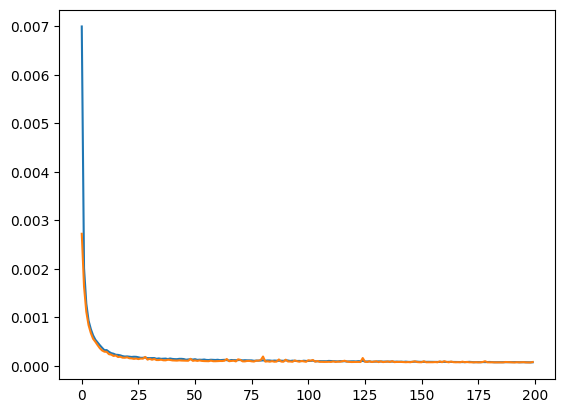

In [7]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['val_loss'])


In [8]:
model.load_state_dict(best_weights)
torch.save(best_weights, '../trained_weights/ResnetSISR.pt')

/tmp/ipykernel_228495/3297833613.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t1 = torch.tensor(LR.view(1,1,75,75))


Text(0.5, 1.0, 'Train_Ground truth')

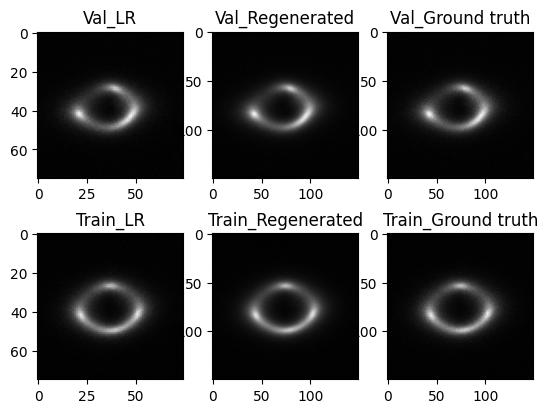

In [9]:
pre, post, tHR = show_random_image(val_dataset, model, 100)
pret, postt, tHRt = show_random_image(train_dataset, model, 900)
plot, axes = plt.subplots(2,3)
axes[0][0].imshow(pre)
axes[0][1].imshow(post)
axes[0][2].imshow(tHR)
axes[0][0].set_title("Val_LR")
axes[0][1].set_title("Val_Regenerated")
axes[0][2].set_title("Val_Ground truth")

axes[1][0].imshow(pret)
axes[1][1].imshow(postt)
axes[1][2].imshow(tHRt)
axes[1][0].set_title("Train_LR")
axes[1][1].set_title("Train_Regenerated")
axes[1][2].set_title("Train_Ground truth")